# Catalogue paper for the second half of O3

- GWTC-3: Compact Binary Coalescences Observed by LIGO and Virgo During the Second Part of the Third Observing Run
- Phys. Rev. X; 13(4):041039; 2023
- DOI: https://doi.org/10.1103/PhysRevX.13.041039
- https://arxiv.org/pdf/2111.03606.pdf
- Data behind the figures: https://zenodo.org/records/7997424
- Parameter estimation data release: https://zenodo.org/records/8177023


> **Disclaimer**: This notebook uses publicly available open-source data for educational purposes only. The code used for plotting is based on personal understanding and the results of the plots should not be taken as a substitute for the figures in the above paper. This is hereby declared.

## Figure 7

## Load libs

In [2]:
import h5py
from os import listdir
from os.path import join
from fnmatch import fnmatch

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 数据需要从 https://zenodo.org/records/7997424 下载，注意：文件比较大。
!ls -lht /home/GWTC3_PE_data_release/IGWN-GWTC3p0-v1-*cosmo.h5 | head

-rw-r--r-- 1 root root  42M Dec  9 14:44 /home/GWTC3_PE_data_release/IGWN-GWTC3p0-v1-GW191103_012549_PEDataRelease_mixed_cosmo.h5
-rw-r--r-- 1 root root  99M Dec  9 14:44 /home/GWTC3_PE_data_release/IGWN-GWTC3p0-v1-GW191215_223052_PEDataRelease_mixed_nocosmo.h5
-rw-r--r-- 1 root root  92M Dec  9 14:44 /home/GWTC3_PE_data_release/IGWN-GWTC3p0-v1-GW200112_155838_PEDataRelease_mixed_cosmo.h5
-rw-r--r-- 1 root root 272M Dec  9 14:44 /home/GWTC3_PE_data_release/IGWN-GWTC3p0-v1-GW191105_143521_PEDataRelease_mixed_nocosmo.h5
-rw-r--r-- 1 root root 259M Dec  9 14:43 /home/GWTC3_PE_data_release/IGWN-GWTC3p0-v1-GW200208_130117_PEDataRelease_mixed_cosmo.h5
-rw-r--r-- 1 root root 356M Dec  9 14:43 /home/GWTC3_PE_data_release/IGWN-GWTC3p0-v1-GW200311_115853_PEDataRelease_mixed_cosmo.h5
-rw-r--r-- 1 root root 358M Dec  9 14:42 /home/GWTC3_PE_data_release/IGWN-GWTC3p0-v1-GW191109_010717_PEDataRelease_mixed_nocosmo.h5
-rw-r--r-- 1 root root  75M Dec  9 14:41 /home/GWTC3_PE_data_release/IGWN-GWTC3p0-v1

In [4]:
!du -sh /home/GWTC3_PE_data_release

16G	/home/GWTC3_PE_data_release


In [5]:
# for use
!ls /home/GWTC3_PE_data_release/IGWN-GWTC3p0-v1-*_cosmo.h5 | wc -l

36


## Read data

In [6]:
# GW200224_222234
file_name = "/home/GWTC3_PE_data_release/IGWN-GWTC3p0-v1-GW200224_222234_PEDataRelease_mixed_nocosmo.h5"

In [8]:
with h5py.File(file_name, "r") as f:
    print("H5 data sets:")
    print(list(f))
    print(list(f['C01:Mixed'].keys()))
    print(f['C01:Mixed']['posterior_samples'])
    print(f['C01:IMRPhenomXPHM']['priors']['samples'])
    priors = pd.DataFrame(dict(f['C01:IMRPhenomXPHM']['priors']['samples']))
    posterior_samples = pd.DataFrame(f['C01:Mixed']['posterior_samples'][:])

H5 data sets:
['C01:IMRPhenomXPHM', 'C01:Mixed', 'C01:SEOBNRv4PHM', 'history', 'version']
['approximant', 'calibration_envelope', 'config_file', 'description', 'injection_data', 'meta_data', 'posterior_samples', 'priors', 'psds', 'version']
<HDF5 dataset "posterior_samples": shape (27066,), type "|V472">
<HDF5 group "/C01:IMRPhenomXPHM/priors/samples" (141 members)>


- 查看数据

In [9]:
priors.shape, posterior_samples.shape

((5000, 141), (27066, 58))

In [10]:
posterior_samples.head()

final_spin   spin_2y  final_mass_source   spin_1y  cos_tilt_2  \
0    0.762918 -0.041085          69.109977  0.014177    0.058832   
1    0.733357  0.023274          65.985930  0.356863   -0.395370   
2    0.739718 -0.093947          69.038893  0.409447    0.626205   
3    0.765359  0.298139          66.657875  0.324863   -0.806156   
4    0.753689  0.321498          65.900583  0.478889   -0.209761   

   mass_1_source  viewing_angle   spin_2x  inverted_mass_ratio     phi_2  ...  \
0      40.733833       1.060127 -0.692939             1.269768  3.200814  ...   
1      37.751510       0.342163 -0.836304             1.196297  3.113770  ...   
2      38.959810       0.711928 -0.238127             1.149041  3.517372  ...   
3      36.032509       0.583759  0.229303             1.048945  0.915173  ...   
4      38.926599       0.628362  0.102761             1.276905  1.261429  ...   

    spin_2z     mass_1  tilt_1_infinity_only_prec_avg  \
0  0.040910  52.771531                       0.305515   
1 -0.360119  50.609139                       0.739061   
2  0.205605  51.059068                       1.233780   
3 -0.512438  49.267700                       1.168438   
4 -0.072410  52.668939                       0.647877   

   tilt_2_infinity_only_prec_avg  spin_1z_infinity_only_prec_avg  \
0                       1.930207                        0.412034   
1                       2.164322                        0.371285   
2                       1.027831                        0.145961   
3                       1.730158                        0.356747   
4                       2.631644                        0.440828   

   spin_2z_infinity_only_prec_avg  chi_eff_infinity_only_prec_avg  \
0                       -0.244574                        0.122750   
1                       -0.509422                       -0.029711   
2                        0.169643                        0.156981   
3                       -0.100871                        0.133404   
4                       -0.301281                        0.114899   

   chi_p_infinity_only_prec_avg  cos_tilt_1_infinity_only_prec_avg  \
0                      0.495520                           0.953692   
1                      0.615253                           0.739102   
2                      0.416576                           0.330673   
3                      0.838270                           0.391589   
4                      0.333645                           0.797367   

   cos_tilt_2_infinity_only_prec_avg  
0                          -0.351722  
1                          -0.559287  
2                           0.516677  
3                          -0.158688  
4                          -0.872769  

[5 rows x 58 columns]

In [11]:
priors.head()

a_1       a_2   azimuth      beta   chi_eff     chi_p  chi_p_2spin  \
0  0.460128  0.444882  2.145117  0.484597 -0.017186  0.454140     0.464483   
1  0.762177  0.548389  1.164424  0.411250 -0.024444  0.713720     0.733618   
2  0.866523  0.216486  2.240282  0.351323  0.025298  0.866394     0.855379   
3  0.922355  0.158073  5.371943  0.940030  0.397972  0.821131     0.821225   
4  0.100252  0.662175  5.333537  0.063933  0.138574  0.087998     0.057907   

   chirp_mass  chirp_mass_source  comoving_distance  ...   spin_2z  \
0   44.889978          21.884712        3521.420488  ...  0.184631   
1   44.930641          20.028612        3960.727207  ...  0.409501   
2   44.157503          20.270804        3817.563846  ...  0.040096   
3   50.214304          21.312379        4197.393685  ...  0.039362   
4   35.246097          24.352617        1765.691667  ...  0.487807   

   symmetric_mass_ratio  theta_jn    tilt_1    tilt_2  time_jitter  \
0              0.171393  0.929696  1.732292  1.142840    -0.000809   
1              0.230105  1.025151  1.929299  0.727658     0.000854   
2              0.242119  2.381255  1.553527  1.384508    -0.000362   
3              0.054737  1.485624  1.097904  1.319135     0.000021   
4              0.153953  1.383336  0.970762  0.742657    -0.000853   

   total_mass  total_mass_source  viewing_angle    zenith  
0  129.346110          63.058671       0.929696  1.561957  
1  108.489419          48.361039       1.025151  2.240795  
2  103.415943          47.473797       0.760338  1.618132  
3  286.984862         121.804539       1.485624  0.802571  
4  108.312447          74.836416       1.383336  0.980989  

[5 rows x 141 columns]

## Plot for an event

- 绘制 `chirp_mass_source` 特征的后验分布 vs 先验分布

In [14]:
data = pd.DataFrame(columns=['event', 'violin', 'chirp_mass_source'])
data.chirp_mass_source = posterior_samples.chirp_mass_source
data.violin = 'upper'
data.event = 'GW200224_222234'

data_prior = pd.DataFrame(columns=['event', 'violin', 'chirp_mass_source'])
data_prior.chirp_mass_source = priors.chirp_mass_source
data_prior.violin = 'bottom'
data_prior.event = 'GW200224_222234'
data = pd.concat([data, data_prior])

In [15]:
data

event  violin  chirp_mass_source
0     GW200224_222234   upper          31.424565
1     GW200224_222234   upper          30.023442
2     GW200224_222234   upper          31.625226
3     GW200224_222234   upper          30.625790
4     GW200224_222234   upper          29.944292
...               ...     ...                ...
4995  GW200224_222234  bottom          16.796509
4996  GW200224_222234  bottom          23.129754
4997  GW200224_222234  bottom          30.269935
4998  GW200224_222234  bottom          14.921696
4999  GW200224_222234  bottom          23.096690

[32066 rows x 3 columns]

<Axes: xlabel='chirp_mass_source', ylabel='event'>

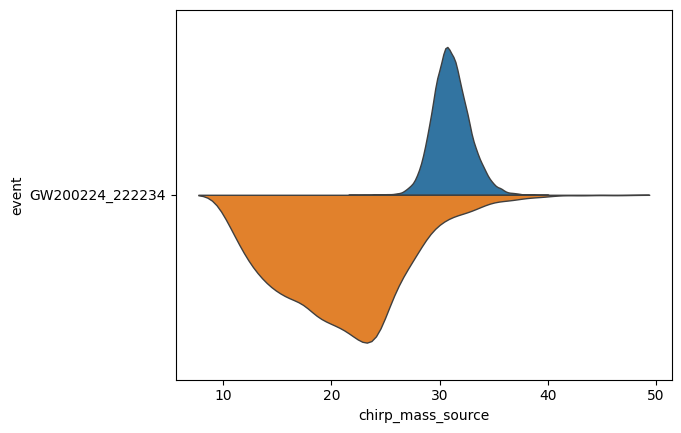

In [16]:
sns.violinplot(x='chirp_mass_source',y='event',data=data,hue='violin',
               orient="h",density_norm='width',inner=None,split=True,legend=False,
               linewidth=1
              )

In [17]:
data.groupby(['event', 'violin']).count()

chirp_mass_source
event           violin                   
GW200224_222234 bottom               5000
                upper               27066

## Plot for multiple events

- 对所有 events 的 `chirp_mass_source` 特征读取其后验分布 vs 先验分布

In [20]:
address

'/home/GWTC3_PE_data_release/'

In [21]:
address = '/home/GWTC3_PE_data_release/'
event_file = sorted([(file.split('_PEDataRelease')[0].split('-')[3], file)
                     for file in listdir(address)
                     if fnmatch(file, 'IGWN-GWTC3p0-v1-*_cosmo.h5')])

df_list = []
for vi, (ename, file_name) in enumerate(event_file):

    with h5py.File(join(address, file_name), "r") as f:
        priors = pd.DataFrame(dict(f['C01:IMRPhenomXPHM'
                                     if ename not in ['GW191219_163120', 'GW200105_162426', 'GW200115_042309']
                                     else 'C01:IMRPhenomXPHM:HighSpin']['priors']['samples']))
        posterior_samples = pd.DataFrame(f['C01:Mixed']['posterior_samples'][:])

        
    df = pd.DataFrame({
        'chirp_mass_source': posterior_samples['chirp_mass_source'],
        'violin': 'upper',
        'event': ename,
    })
    df_list.append(df)
    df_prior = pd.DataFrame({
        'chirp_mass_source': priors['chirp_mass_source'],
        'violin': 'bottom',
        'event': ename,
    })
    df_list.append(df_prior)
data = pd.concat(df_list)

In [23]:
data

chirp_mass_source  violin            event
0              8.929873   upper  GW191103_012549
1              8.074338   upper  GW191103_012549
2              8.273513   upper  GW191103_012549
3              8.369736   upper  GW191103_012549
4              8.441250   upper  GW191103_012549
...                 ...     ...              ...
4995          38.664199  bottom  GW200322_091133
4996          36.743287  bottom  GW200322_091133
4997           6.229935  bottom  GW200322_091133
4998          29.972274  bottom  GW200322_091133
4999          28.636753  bottom  GW200322_091133

[828031 rows x 3 columns]

In [24]:
data.groupby(['event', 'violin']).count()

chirp_mass_source
event           violin                   
GW191103_012549 bottom               5000
                upper                9859
GW191105_143521 bottom               5000
                upper               16861
GW191109_010717 bottom               5000
...                                   ...
GW200311_115853 upper               20276
GW200316_215756 bottom               5000
                upper              130037
GW200322_091133 bottom               5000
                upper                  69

[72 rows x 1 columns]

<Axes: xlabel='chirp_mass_source', ylabel='event'>

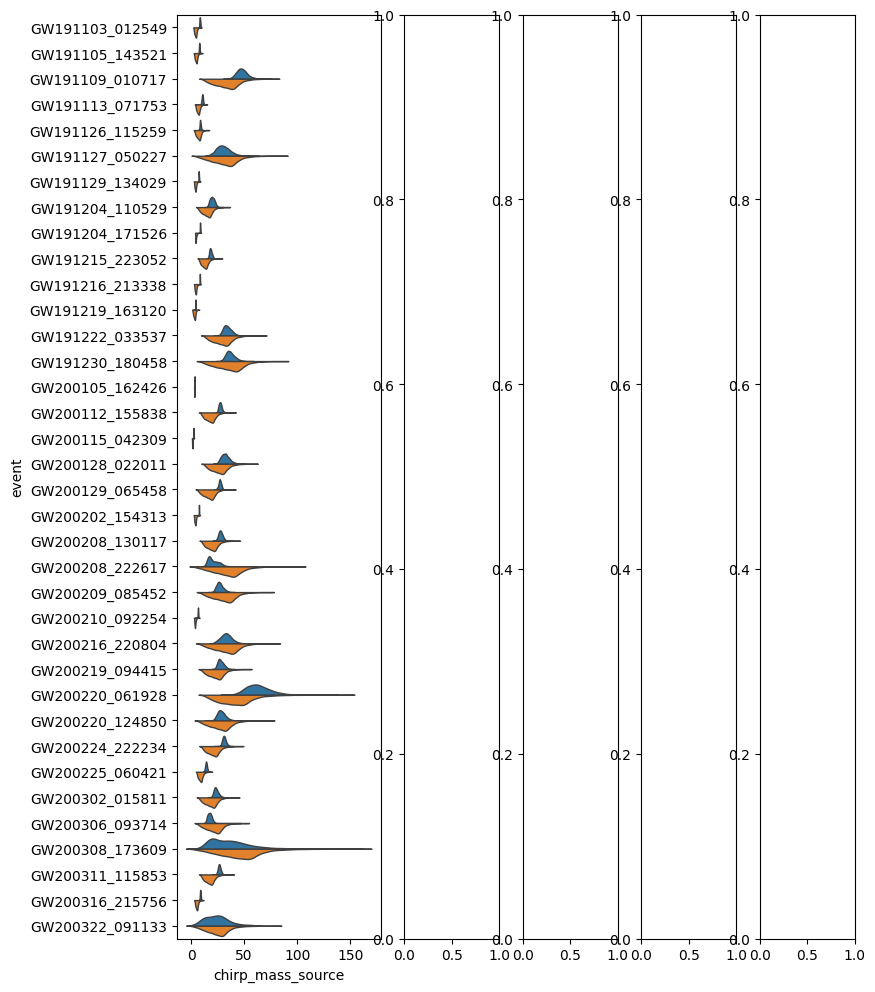

In [25]:
fig,ax = plt.subplots(1, 5, figsize=(8.75,12), sharey=False,
                      gridspec_kw = {'wspace':0.2, 'width_ratios':[1.5, 0.7, 0.7, 0.7, 0.7]})

sns.violinplot(x='chirp_mass_source',y='event',data=data,hue='violin',
               orient="h",density_norm='width',inner=None,split=True,legend=False,
               ax=ax[0],
               linewidth=1
              )

- 修改一下坐标轴的标度等

In [26]:
address = '/home/GWTC3_PE_data_release/'
event_file = sorted([(file.split('_PEDataRelease')[0].split('-')[3], file)
                     for file in listdir(address)
                     if fnmatch(file, 'IGWN-GWTC3p0-v1-*_cosmo.h5')])

df_list = []

for vi, (ename, file_name) in enumerate(event_file):

    with h5py.File(join(address, file_name), "r") as f:
        priors = pd.DataFrame(dict(f['C01:IMRPhenomXPHM'
                                     if ename not in ['GW191219_163120', 'GW200105_162426', 'GW200115_042309']
                                     else 'C01:IMRPhenomXPHM:HighSpin']['priors']['samples']))
        posterior_samples = pd.DataFrame(f['C01:Mixed']['posterior_samples'][:])

        
    df = pd.DataFrame({ # 取对数
        'chirp_mass_source': np.log10(posterior_samples['chirp_mass_source']),
        'violin': 'upper',
        'event': ename,
    })
    df_list.append(df)
    df_prior = pd.DataFrame({ # 取对数
        'chirp_mass_source': np.log10(priors['chirp_mass_source']),
        'violin': 'bottom',
        'event': ename,
    })
    df_list.append(df_prior)
data = pd.concat(df_list)

[Text(0.3010299956639812, 1, '$2$'),
 Text(0.6989700043360189, 1, '$5$'),
 Text(1.0, 1, '$10$'),
 Text(1.3010299956639813, 1, '$20$'),
 Text(1.6989700043360187, 1, '$50$'),
 Text(2.0, 1, '$100$')]

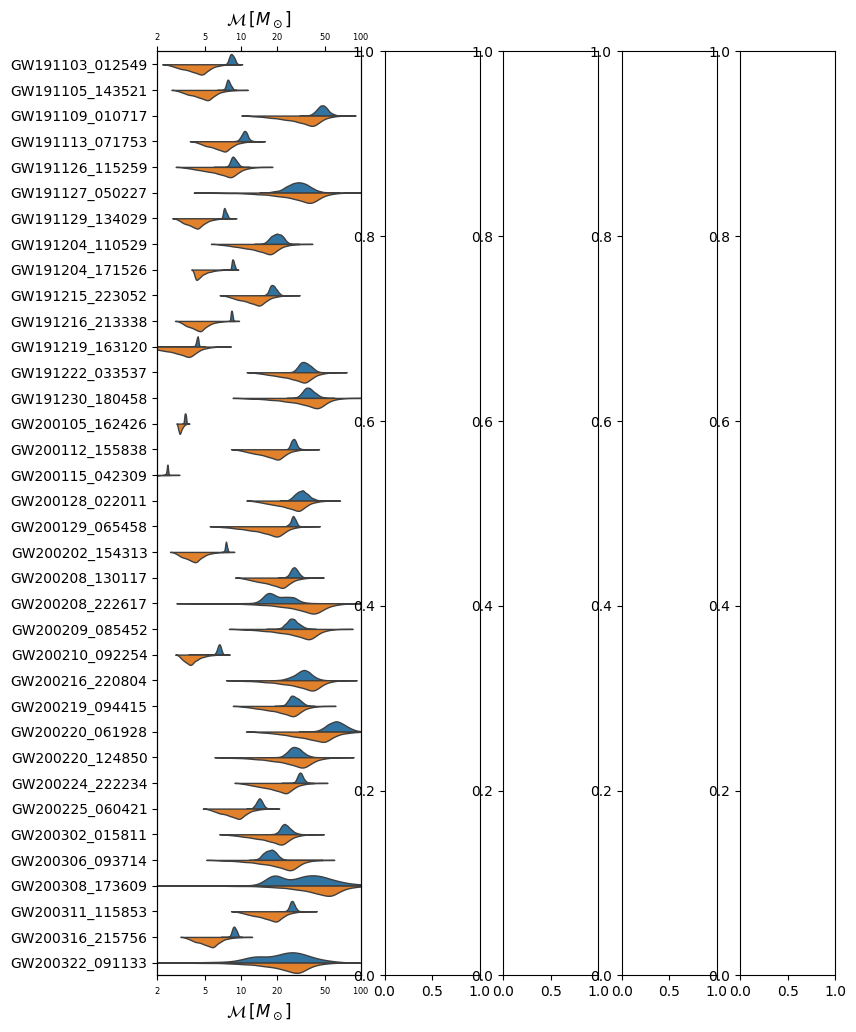

In [27]:
fig,ax = plt.subplots(1, 5,figsize=(8.75,12),sharey=False,
                      gridspec_kw = {'wspace':0.2, 'width_ratios':[1.5, 0.7, 0.7, 0.7, 0.7]})

# 为其他 params 维度的循环做准备
vi=0
var='chirp_mass_source'
xlim = [2,100]
tick_map = {
    'chirp_mass_source':[2,5,10,20,50,100],
}

sns_axi = sns.violinplot(x=var, y='event',data=data,hue='violin',
                         orient="h",density_norm='width',inner=None,split=True,legend=False,
                         ax=ax[vi],
                         linewidth=1,
                        )

# set x labels
ax[vi].set_xlabel(r'$'+r'\mathcal{{M}}\:[M_\odot]'+r'$',fontsize=12)
# set top x label
ax_copy = ax[vi].twiny()
ax_copy.set_xlabel(r'$'+r'\mathcal{{M}}\:[M_\odot]'+r'$',fontsize=12)

# 设定坐标的边界
ax[vi].set_xlim(np.log10(xlim[2*vi:2*vi+2]))
ax_copy.set_xlim(np.log10(xlim[2*vi:2*vi+2]))
# 删掉 `events`
ax[vi].set_ylabel('')

# set tick labels
ax[vi].set_xticks(np.log10(tick_map[var]))
ax_copy.set_xticks(np.log10(tick_map[var]))
sns_axi.set_xticklabels([f'${lab}$' for lab in tick_map[var]], fontsize=6)
ax_copy.set_xticklabels([f'${lab}$' for lab in tick_map[var]], fontsize=6)

## Plot for multiple params

In [28]:
address = '/home/GWTC3_PE_data_release/'
event_file = sorted([(file.split('_PEDataRelease')[0].split('-')[3], file)
                     for file in listdir(address)
                     if fnmatch(file, 'IGWN-GWTC3p0-v1-*_cosmo.h5')])

# 指定五个参数维度
vars = ['chirp_mass_source', 'mass_ratio', 'chi_eff', 'chi_p', 'luminosity_distance']
df_list = []

for vi, (ename, file_name) in enumerate(event_file):

    with h5py.File(join(address, file_name), "r") as f:
        priors = pd.DataFrame(dict(f['C01:IMRPhenomXPHM'
                                     if ename not in ['GW191219_163120', 'GW200105_162426', 'GW200115_042309']
                                     else 'C01:IMRPhenomXPHM:HighSpin']['priors']['samples']))
        posterior_samples = pd.DataFrame(f['C01:Mixed']['posterior_samples'][:])
    
        
    df = pd.DataFrame({
        **{  # 对 chirp_mass_source, mass_ratio 以及 luminosity_distance 特征在scale上进行处理
            var: np.log10(posterior_samples[var] / (1000 if var=='luminosity_distance' else 1))
            if 'mass' in var or 'distance' in var
            else posterior_samples[var] for var in vars
        },
        'violin': 'upper',
        'event': ename,
    })
    df_list.append(df)
    df_prior = pd.DataFrame({
        **{
            var: np.log10(priors[var] / (1000 if var=='luminosity_distance' else 1))
            if 'mass' in var or 'distance' in var
            else priors[var] for var in vars
        },
        'violin': 'bottom',
        'event': ename,
    })
    df_list.append(df_prior)
data = pd.concat(df_list)

In [29]:
data

chirp_mass_source  mass_ratio   chi_eff     chi_p  luminosity_distance  \
0              0.950845   -0.013426  0.124681  0.398897            -0.288171   
1              0.907107   -0.028997  0.210005  0.232888             0.091748   
2              0.917690   -0.082065  0.191831  0.381942             0.032501   
3              0.922712   -0.353322  0.285288  0.516188             0.004128   
4              0.926407   -0.233709  0.228022  0.338341            -0.055944   
...                 ...         ...       ...       ...                  ...   
4995           1.587309   -0.978478  0.808248  0.074668             1.194721   
4996           1.565178   -0.550964  0.195930  0.293281             1.211398   
4997           0.794484   -0.258141  0.201115  0.305499             1.227825   
4998           1.476720   -0.808768 -0.019374  0.188534             1.387833   
4999           1.456924   -1.235778  0.023160  0.240524             1.211484   

      violin            event  
0      upper  GW191103_012549  
1      upper  GW191103_012549  
2      upper  GW191103_012549  
3      upper  GW191103_012549  
4      upper  GW191103_012549  
...      ...              ...  
4995  bottom  GW200322_091133  
4996  bottom  GW200322_091133  
4997  bottom  GW200322_091133  
4998  bottom  GW200322_091133  
4999  bottom  GW200322_091133  

[828031 rows x 7 columns]

In [30]:
data.groupby(['event', 'violin']).count()

chirp_mass_source  mass_ratio  chi_eff   chi_p  \
event           violin                                                   
GW191103_012549 bottom               5000        5000     5000    5000   
                upper                9859        9859     9859    9859   
GW191105_143521 bottom               5000        5000     5000    5000   
                upper               16861       16861    16861   16861   
GW191109_010717 bottom               5000        5000     5000    5000   
...                                   ...         ...      ...     ...   
GW200311_115853 upper               20276       20276    20276   20276   
GW200316_215756 bottom               5000        5000     5000    5000   
                upper              130037      130037   130037  130037   
GW200322_091133 bottom               5000        5000     5000    5000   
                upper                  69          69       69      69   

                        luminosity_distance  
event           violin                       
GW191103_012549 bottom                 5000  
                upper                  9859  
GW191105_143521 bottom                 5000  
                upper                 16861  
GW191109_010717 bottom                 5000  
...                                     ...  
GW200311_115853 upper                 20276  
GW200316_215756 bottom                 5000  
                upper                130037  
GW200322_091133 bottom                 5000  
                upper                    69  

[72 rows x 5 columns]

> Bug: GW200322_091133 posterior?

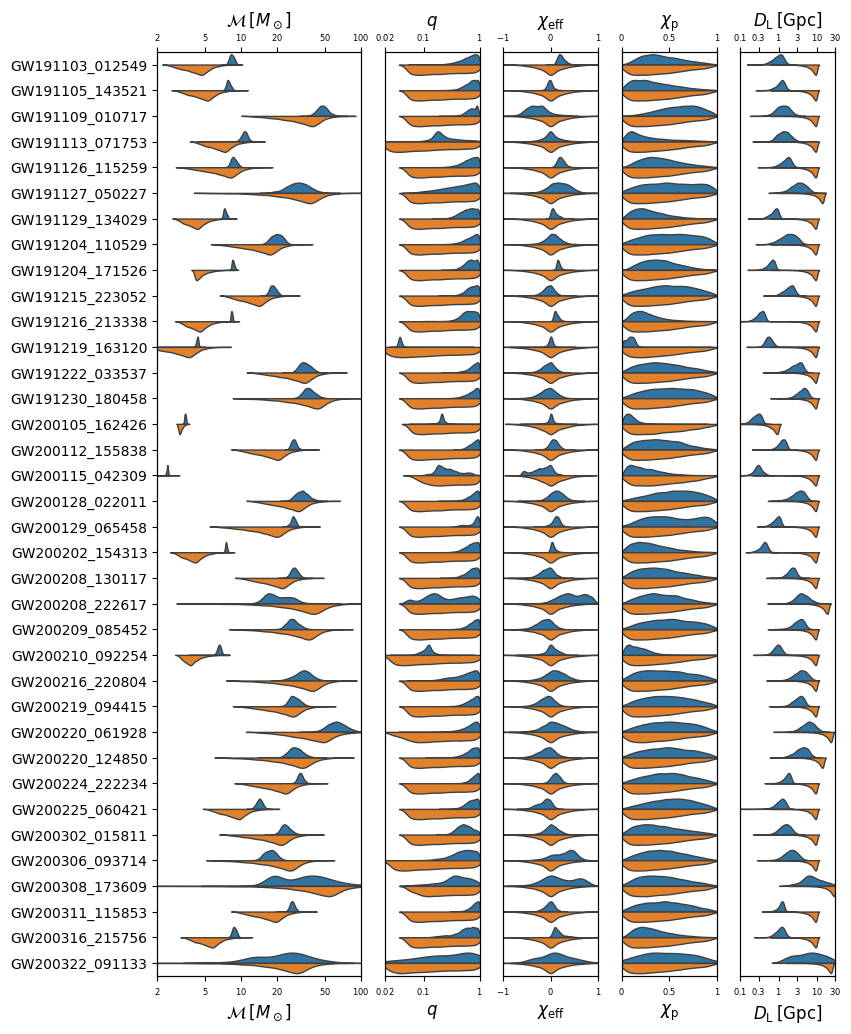

In [31]:
fig,ax = plt.subplots(1, len(vars), figsize=(8.75,12),sharey=False,
                      gridspec_kw = {'wspace':0.2, 'width_ratios':[1.5, 0.7, 0.7, 0.7, 0.7]})
xlim = [2,100,0.02,1,-1,1,0,1,0.1,30]

tick_map = {
    'chirp_mass_source':[2,5,10,20,50,100],
    'mass_ratio': [0.02, 0.1, 1],
    'chi_eff': [-1,0,1],
    'chi_p': [0, 0.5, 1],
    'luminosity_distance': [0.1,0.3,1,3,10,30]
}

column_name2tex_name = {
        'chirp_mass_source':r'\mathcal{{M}}\:[M_\odot]',
        'mass_ratio':r'q',
        'chi_eff':r'\chi_{{\rm eff}}',
        'chi_p':r'\chi_{{\rm p}}',
        'luminosity_distance':r'D_{\rm L}\:[{\rm Gpc}]',
}

for vi, var in enumerate(vars):
    sns_axi = sns.violinplot(x=var, y='event',data=data,hue='violin',
                             orient="h",density_norm='width',inner=None,split=True,legend=False,
                             ax=ax[vi],
                             linewidth=1
                            )

    # set x labels
    ax[vi].set_xlabel(r'$'+column_name2tex_name[var]+r'$',fontsize=12)
    # set top x label
    ax_copy = ax[vi].twiny()
    ax_copy.set_xlabel(r'$'+column_name2tex_name[var]+r'$',fontsize=12)
    
    # 设定坐标的边界
    if 'mass' in var or 'distance' in var:
        ax[vi].set_xlim(np.log10(xlim[2*vi:2*vi+2]))
        ax_copy.set_xlim(np.log10(xlim[2*vi:2*vi+2]))
    else:
        ax[vi].set_xlim(xlim[2*vi:2*vi+2])
        ax_copy.set_xlim(xlim[2*vi:2*vi+2])

    # 删掉 `events`        
    ax[vi].set_ylabel('')
    if vi:    
        ax[vi].yaxis.set_visible(False)

    # set tick labels
    if 'mass' in var or 'distance' in var:
        ax[vi].set_xticks(np.log10(tick_map[var]))
        ax_copy.set_xticks(np.log10(tick_map[var]))
        sns_axi.set_xticklabels([f'${lab}$' for lab in tick_map[var]], fontsize=6)
        ax_copy.set_xticklabels([f'${lab}$' for lab in tick_map[var]], fontsize=6)
    else:
        sns_axi.set_xticks(tick_map[var])
        ax_copy.set_xticks(tick_map[var])
        sns_axi.set_xticklabels([f'${lab}$' for lab in tick_map[var]], fontsize=6)
        ax_copy.set_xticklabels([f'${lab}$' for lab in tick_map[var]], fontsize=6)

## Stylize your plot

In [33]:
sns.color_palette("Spectral_r", 10).as_hex()

['#3682ba',
 '#5cb7aa',
 '#97d5a4',
 '#d1ed9c',
 '#f4faad',
 '#fff1a8',
 '#fece7c',
 '#fa9b58',
 '#ee6445',
 '#d0384e']

In [32]:
sns.set()

CPU times: user 2min 15s, sys: 15min 14s, total: 17min 30s
Wall time: 38 s


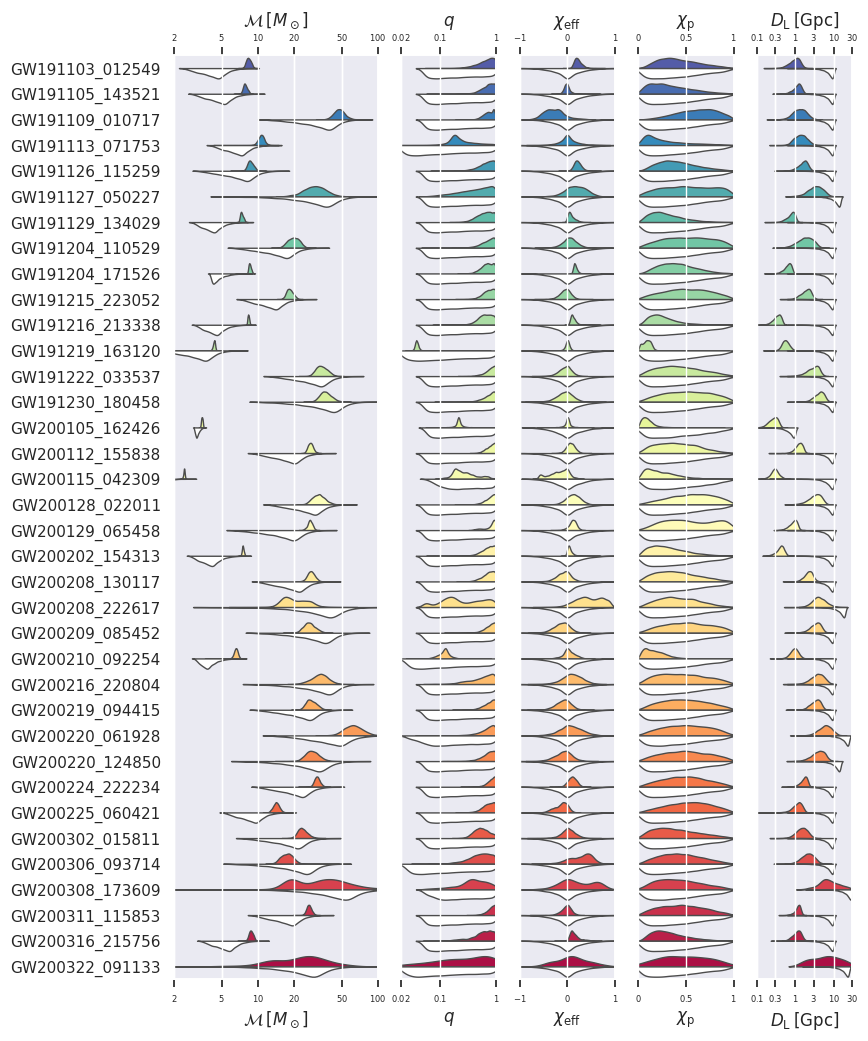

In [37]:
%%time
fig,ax = plt.subplots(1, len(vars), figsize=(8.75,12),sharey=False,
                      gridspec_kw = {'wspace':0.2, 'width_ratios':[1.5, 0.7, 0.7, 0.7, 0.7]})
xlim = [2,100,0.02,1,-1,1,0,1,0.1,30]

tick_map = {
    'chirp_mass_source':[2,5,10,20,50,100],
    'mass_ratio': [0.02, 0.1, 1],
    'chi_eff': [-1,0,1],
    'chi_p': [0, 0.5, 1],
    'luminosity_distance': [0.1,0.3,1,3,10,30]
}

column_name2tex_name = {
        'chirp_mass_source':r'\mathcal{{M}}\:[M_\odot]',
        'mass_ratio':r'q',
        'chi_eff':r'\chi_{{\rm eff}}',
        'chi_p':r'\chi_{{\rm p}}',
        'luminosity_distance':r'D_{\rm L}\:[{\rm Gpc}]',
        }

# 获取颜色参数
colors = sns.color_palette("Spectral_r", len(event_file)).as_hex()

for vi, var in enumerate(vars):
    sns_axi = sns.violinplot(x=var, y='event',data=data,hue='violin',
                             orient="h",density_norm='width',inner=None,split=True,legend=False,
                             ax=ax[vi],#palette=colors,
                             linewidth=1
                            )

    # loop over violins to add hatching and shading where required
    violin_pairs = []
    for v, violin_half in enumerate(sns_axi.get_children()):
        if v % 2 == 0: # Upper violin
            violin_pairs.append([])
        violin_pairs[-1].append(violin_half)
    for pair, (ev, _), col in zip(violin_pairs, event_file, colors): # 给每个 event 指定颜色
        # print(ev)
        pair[0].set_facecolor(col)        # 为 posterior 指定颜色
        pair[1].set_facecolor('#FFFFFF')  # 为 prior 白色

    # set x labels
    ax[vi].set_xlabel(r'$'+column_name2tex_name[var]+r'$',fontsize=12)
    # set top x label
    ax_copy = ax[vi].twiny()
    ax_copy.set_xlabel(r'$'+column_name2tex_name[var]+r'$',fontsize=12)
    
    # 设定坐标的边界
    if 'mass' in var or 'distance' in var:
        ax[vi].set_xlim(np.log10(xlim[2*vi:2*vi+2]))
        ax_copy.set_xlim(np.log10(xlim[2*vi:2*vi+2]))
    else:
        ax[vi].set_xlim(xlim[2*vi:2*vi+2])
        
        
        ax_copy.set_xlim(xlim[2*vi:2*vi+2])

    # 删掉 `events`        
    ax[vi].set_ylabel('')
    if vi:    
        ax[vi].yaxis.set_visible(False)

    # set tick labels
    if 'mass' in var or 'distance' in var:
        ax[vi].set_xticks(np.log10(tick_map[var]))
        ax_copy.set_xticks(np.log10(tick_map[var]))
        sns_axi.set_xticklabels([f'${lab}$' for lab in tick_map[var]], fontsize=6)
        ax_copy.set_xticklabels([f'${lab}$' for lab in tick_map[var]], fontsize=6)
    else:
        sns_axi.set_xticks(tick_map[var])
        ax_copy.set_xticks(tick_map[var])
        sns_axi.set_xticklabels([f'${lab}$' for lab in tick_map[var]], fontsize=6)
        ax_copy.set_xticklabels([f'${lab}$' for lab in tick_map[var]], fontsize=6)

> **Disclaimer**: This notebook uses publicly available open-source data for educational purposes only. The code used for plotting is based on personal understanding and the results of the plots should not be taken as a substitute for the figures in the above paper. This is hereby declared.